<a href="https://www.kaggle.com/code/mennaelsayed1/heart-attack-ambulance?scriptVersionId=156341691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Logistic Regression 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score , mean_squared_error

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-ambulance1/Heart Attack Data Set (1).csv")


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns = df.columns.str.title()
df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.rename(columns={'Sex' : 'Gender'},inplace=True)
df.rename(columns={'Cp' : 'Chest Pain'},inplace=True)
df.rename(columns={'Trestbps' : 'Restbps'},inplace=True)

df

,Age,Gender,Chest Pain,Restbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         303 non-null    int64  
 1   Gender      303 non-null    int64  
 2   Chest Pain  303 non-null    int64  
 3   Restbps     303 non-null    int64  
 4   Chol        303 non-null    int64  
 5   Fbs         303 non-null    int64  
 6   Restecg     303 non-null    int64  
 7   Thalach     303 non-null    int64  
 8   Exang       303 non-null    int64  
 9   Oldpeak     303 non-null    float64
 10  Slope       303 non-null    int64  
 11  Ca          303 non-null    int64  
 12  Thal        303 non-null    int64  
 13  Target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

Age           0
Gender        0
Chest Pain    0
Restbps       0
Chol          0
Fbs           0
Restecg       0
Thalach       0
Exang         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
Target        0
dtype: int64

In [9]:
df.describe()

,Age,Gender,Chest Pain,Restbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.mean()

Age            54.420530
Gender          0.682119
Chest Pain      0.963576
Restbps       131.602649
Chol          246.500000
Fbs             0.149007
Restecg         0.526490
Thalach       149.569536
Exang           0.327815
Oldpeak         1.043046
Slope           1.397351
Ca              0.718543
Thal            2.314570
Target          0.543046
dtype: float64

In [15]:
df.median()

Age            55.5
Gender          1.0
Chest Pain      1.0
Restbps       130.0
Chol          240.5
Fbs             0.0
Restecg         1.0
Thalach       152.5
Exang           0.0
Oldpeak         0.8
Slope           1.0
Ca              0.0
Thal            2.0
Target          1.0
dtype: float64

In [16]:
df['Gender'].value_counts()

Gender
1    206
0     96
Name: count, dtype: int64

In [17]:
df.corr()

,Age,Gender,Chest Pain,Restbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
Age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
Gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest Pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Restbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
Restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
Oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Visualization

<Axes: >

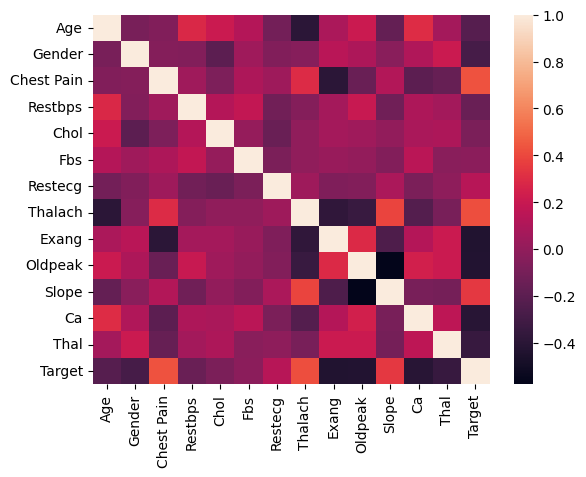

In [18]:
sns.heatmap(df.corr())

<Axes: >

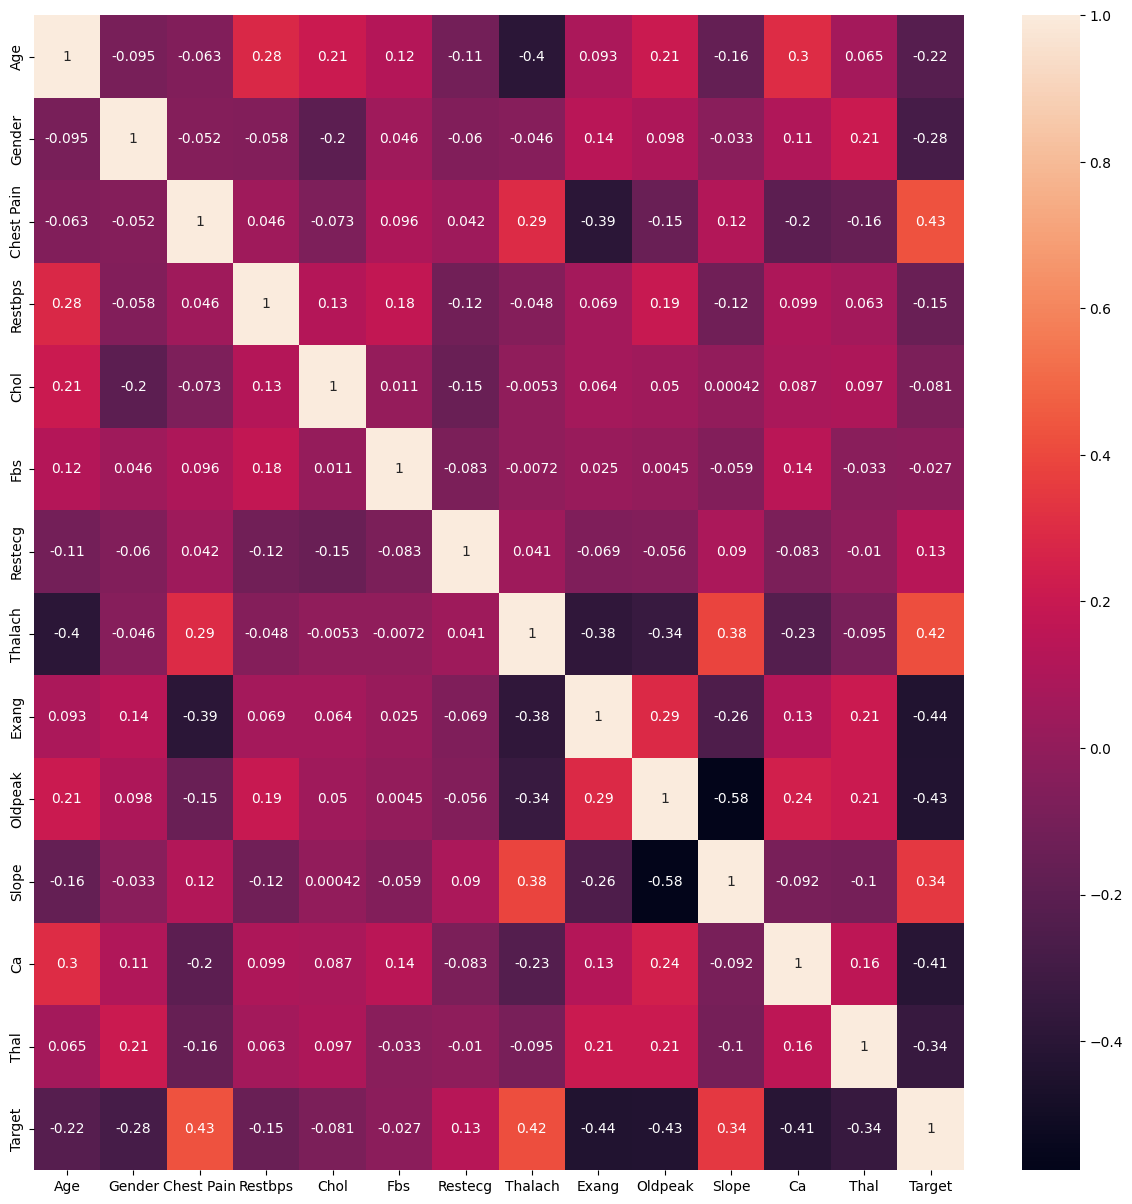

In [19]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot= True)

<Axes: >

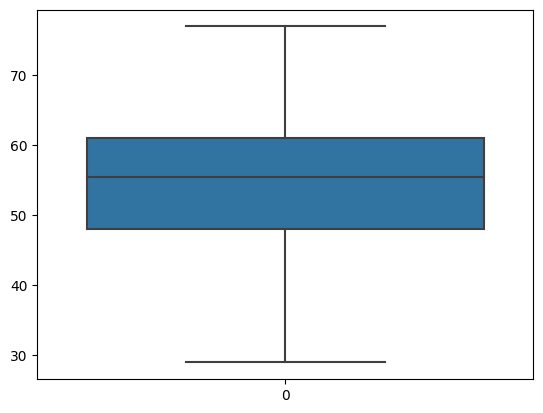

In [20]:
sns.boxplot(df['Age'])

<Axes: >

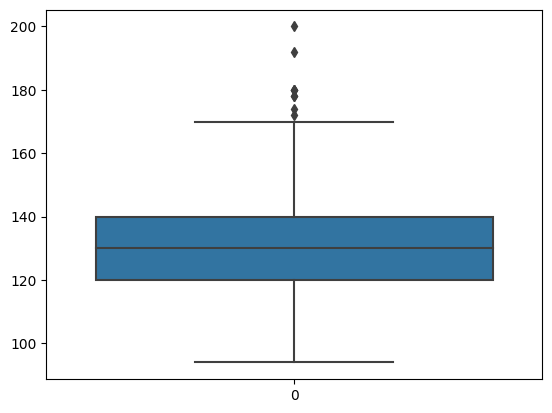

In [21]:
sns.boxplot(df['Restbps'])

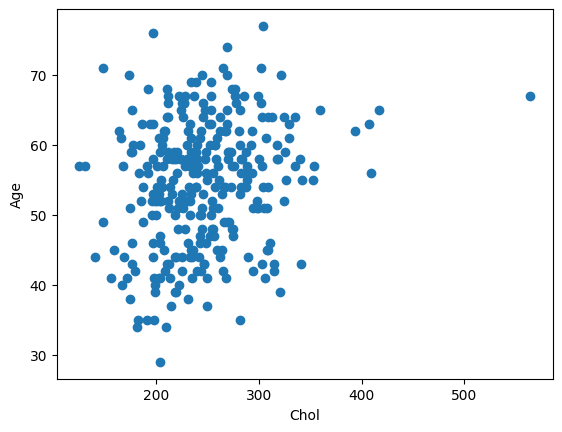

In [22]:
# plt.scatter(x = df['age'] , y = ['chol'])
plt.scatter(df['Chol'],df['Age'])
plt.xlabel('Chol')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='Chol', ylabel='Age'>

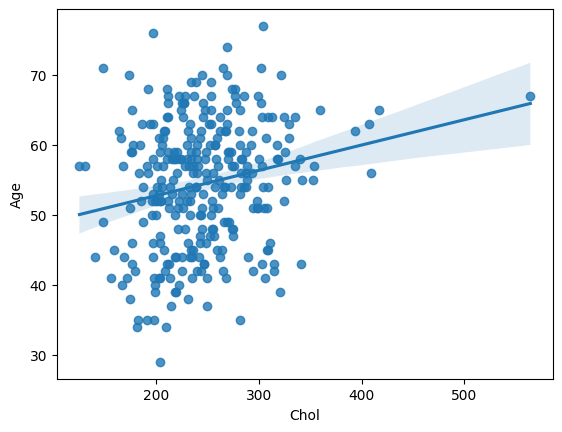

In [23]:
sns.regplot(x = df['Chol'] , y = df['Age'])

/tmp/ipykernel_19/2346333515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Chol'])


<Axes: xlabel='Chol', ylabel='Density'>

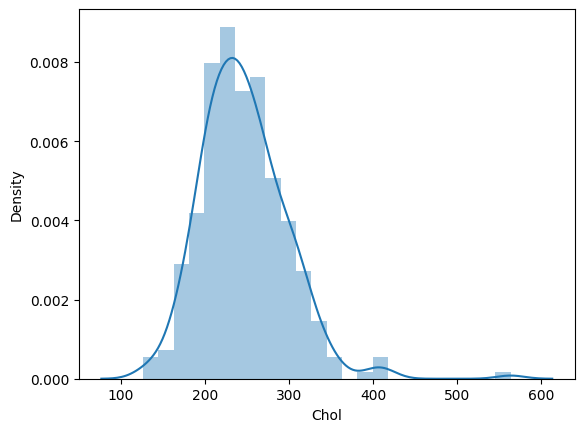

In [24]:
sns.distplot(df['Chol'])

/tmp/ipykernel_19/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

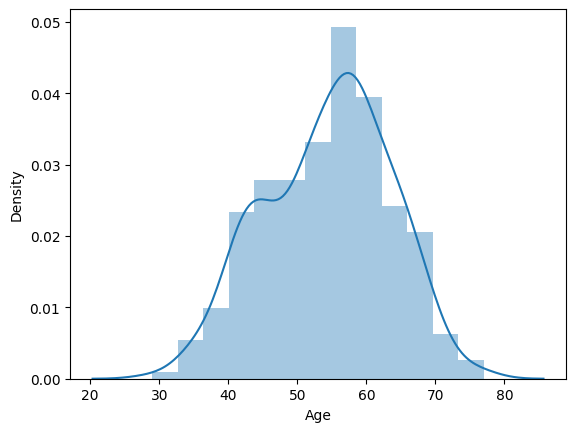

In [25]:
sns.distplot(df['Age'])

<Axes: xlabel='Age'>

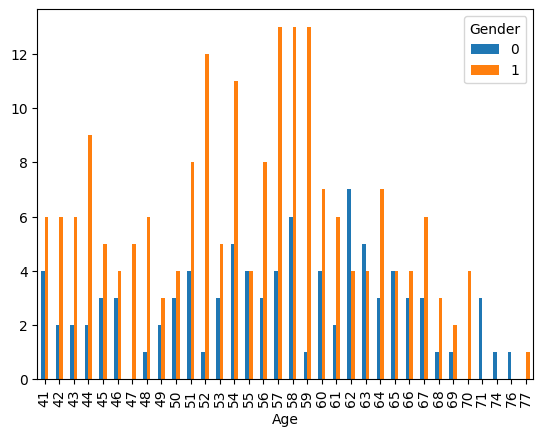

In [26]:
data_over_40  = df[df['Age'] > 40]
data_over_40 .groupby('Age')['Gender'].value_counts().unstack().plot(kind='bar')

In [27]:
x = df.drop('Target',axis=1)
y =df['Target']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
x_train_pred=model.predict(x_train)
train_acc=accuracy_score(x_train_pred,y_train)
train_acc

0.8589211618257261

In [32]:
 x_test_pred=model.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
test_acc

0.8524590163934426

#  Building a Predictive System

In [33]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart disease ')
else:
  print('The Person has Heart disease')

[0]
The Person does not have a Heart disease 


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# conert Categorical value to one_hot encoding 

In [34]:
df.head()

,Age,Gender,Chest Pain,Restbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
numerical_cols = ['age' , 'trestbps','chol','thal','oldpeak']
cat_cols = list(set(df.columns)-set(numerical_cols)-{'target'})

In [36]:
df.columns

Index(['Age', 'Gender', 'Chest Pain', 'Restbps', 'Chol', 'Fbs', 'Restecg',
       'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [37]:
cat_cols

['Fbs',
 'Thalach',
 'Ca',
 'Thal',
 'Slope',
 'Exang',
 'Target',
 'Chol',
 'Chest Pain',
 'Gender',
 'Oldpeak',
 'Restecg',
 'Restbps',
 'Age']

# Decision Tree Classifier

In [38]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
dtf_pred=dc.predict(x_test)
mean_squared_error(y_test,dtf_pred)

0.2459016393442623

In [40]:
accuracy_score(y_test,dtf_pred)


0.7540983606557377

# Random Forest Classifier 

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
rf_pred=rf.predict(x_test)
mean_squared_error(y_test,rf_pred)

0.18032786885245902

In [43]:
accuracy_score(y_test,rf_pred)


0.819672131147541

# SVM Algorithm

In [44]:
svm= SVC()
svm.fit(x_train,y_train)

SVC()

In [45]:
svm_pred=svm.predict(x_test)
mean_squared_error(y_test,svm_pred)

0.47540983606557374

In [46]:
accuracy_score(y_test,svm_pred)


0.5245901639344263

# DEPLOYMENT

# heart-disease-prediction-website


# website is build using technology like  Frontend = Html , Backend = Python flask mysqldb \n Research = jupyter notebook - Machine learning \n Algorithm 



# Ambulance  " Clustering" 

In [47]:
!pip install folium

In [48]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
import folium
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Data preprocessing
#

In [49]:
df = pd.read_csv("/kaggle/input/heart-attack-ambulance1/ambulance.csv.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
 4   Date       796121 non-null  object 
dtypes: float64(2), object(3)
memory usage: 30.4+ MB


In [51]:
df.describe()

,Lat,Lon
count,796121.000000,796121.000000
mean,40.739141,-73.972353
std,0.040551,0.058660
min,39.721400,-74.826000
25%,40.720900,-73.996100
50%,40.742500,-73.983200
75%,40.760800,-73.965100
max,41.341300,-72.309700


In [52]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date'], dtype='object')

In [53]:
df.isnull()

,Date/Time,Lat,Lon,Base,Date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
796116,False,False,False,False,False
796117,False,False,False,False,False
796118,False,False,False,False,False
796119,False,False,False,False,False


In [54]:
df.isnull().any()

Date/Time    False
Lat          False
Lon          False
Base         False
Date         False
dtype: bool

In [55]:
df.duplicated().sum()

14152

In [56]:
df.shape

(796121, 5)

In [57]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
Date          object
dtype: object

In [58]:
y= df.isnull().any(axis=0) 
y

Date/Time    False
Lat          False
Lon          False
Base         False
Date         False
dtype: bool

In [59]:
cols_without_nan=df.columns[~y] 
cols_without_nan

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date'], dtype='object')

In [60]:
print(df['Date/Time'].unique()) 
print(df['Lat'].unique()) 
print(df['Lon'].unique())  
print(df['Date'].unique()) 

['2014-07-01 0:03' '2014-07-01 0:05' '2014-07-01 0:06' ...
 '2014-07-08 2:14' '2014-07-10 4:02' '2014-07-15 3:32']
[40.7586 40.7605 40.732  ... 41.0747 41.0079 40.9923]
[-73.9706 -73.9994 -73.9999 ... -73.5916 -73.6632 -73.5057]
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']


In [61]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [62]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
df['y'] = y_kmeans

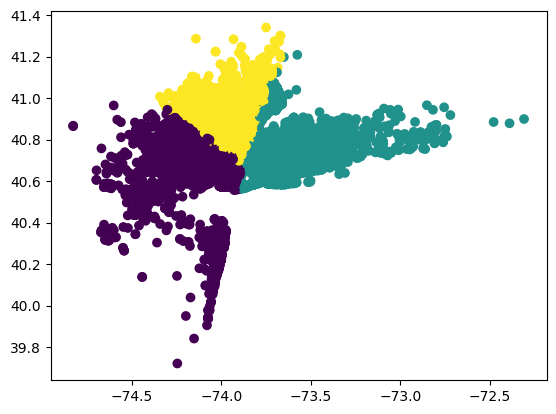

In [64]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

In [65]:
model.inertia_

1957.7422228737496

In [66]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,n_init='auto')
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

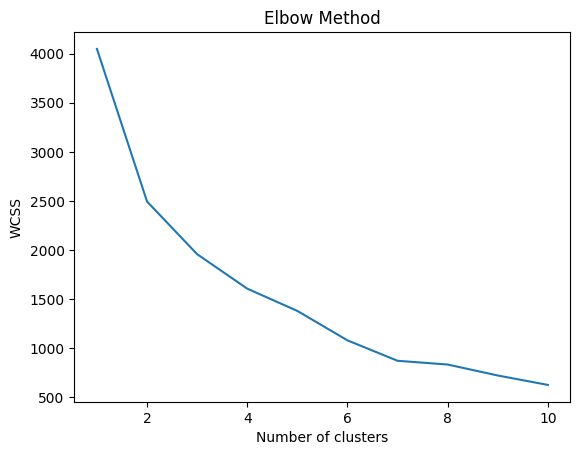

In [67]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [68]:
df = df[:2000]

cluster1 = df[['Lat', "Lon"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', "Lon"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', "Lon"]][df['y'] == 2].values.tolist()

In [69]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

In [70]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

In [71]:
map

# Ambulance_Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

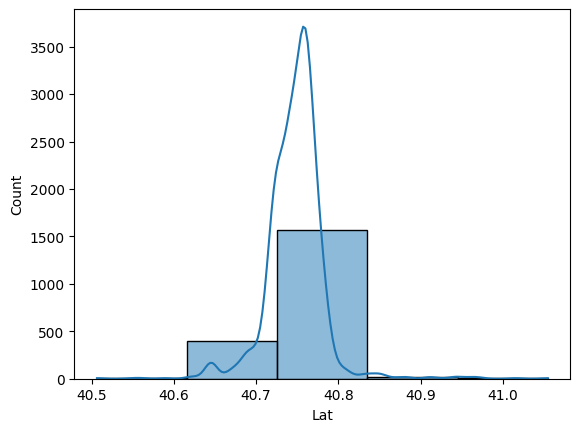

In [72]:
sns.histplot(df['Lat'],bins=5,kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

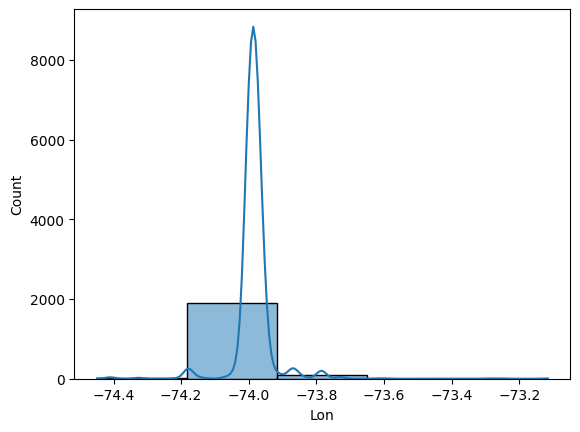

In [73]:
sns.histplot(df['Lon'],bins=5,kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

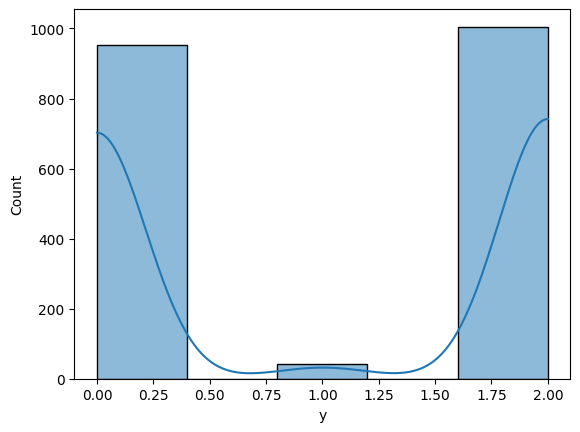

In [74]:
sns.histplot(df['y'],bins=5,kde=True)
plt.show

<Axes: >

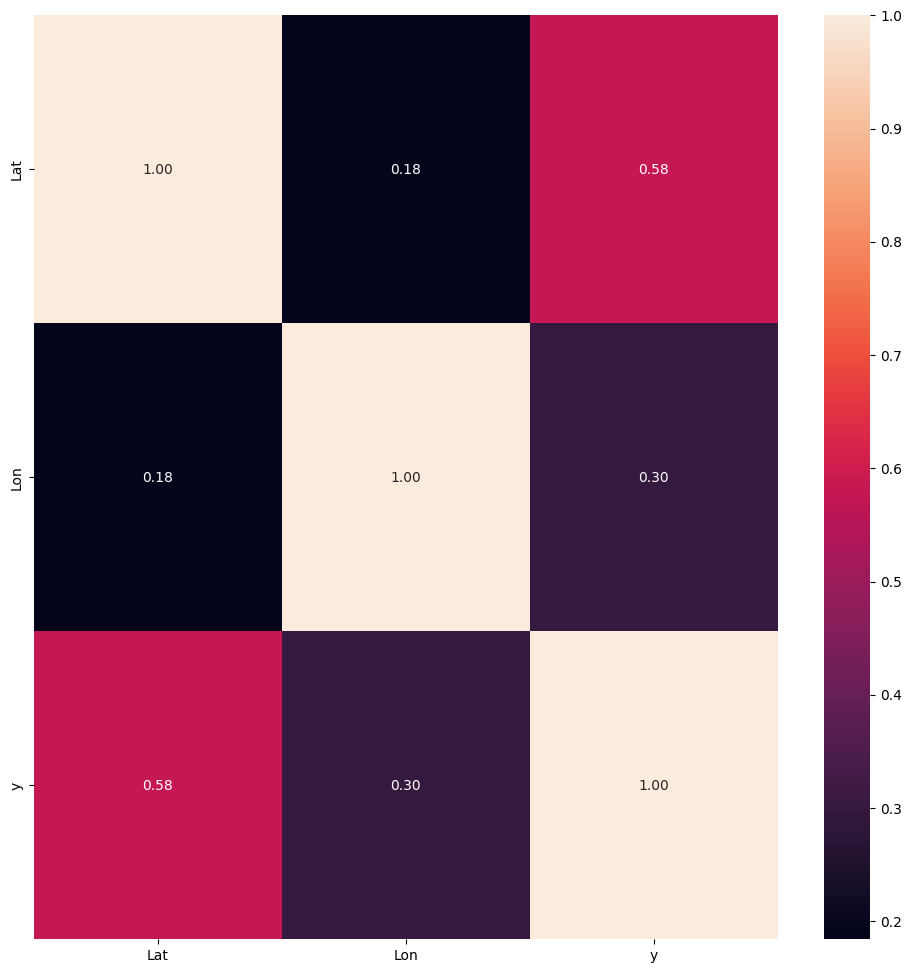

In [75]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')

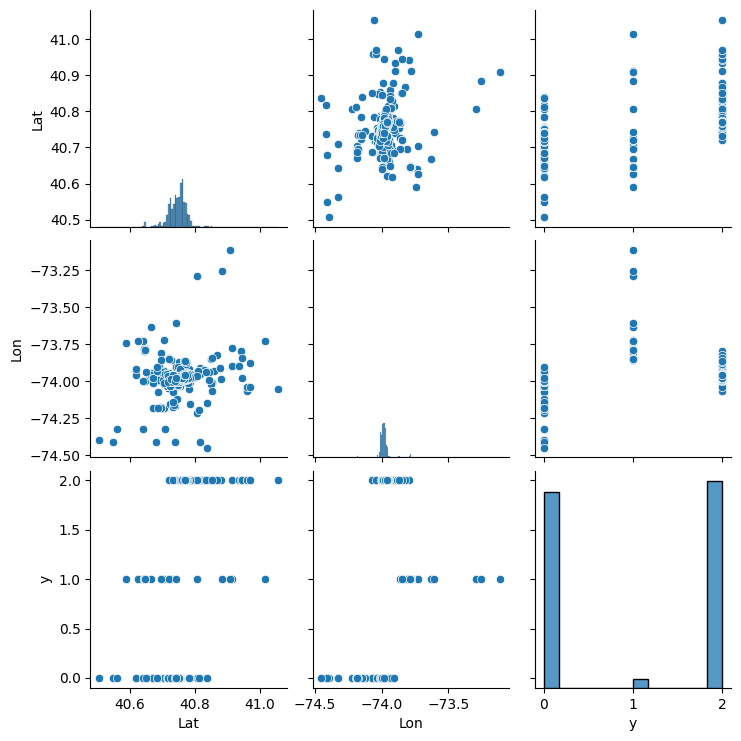

In [76]:
sns.pairplot(df)
plt.show()

#  And here we come to the end .